# Caso de Estudio: Clasificación de la Planta Iris

[Alan Badillo Salas](mailto:alan@nomadacode.com)

Etapas de Machine Learning:

1. Adquicisión de los datos (desde un CSV con `pandas`)
2. Inspección de los datos (ver muestras aleatorias, valores únicos, visualización, etc.)
3. Construcción del modelo de aprendizaje (Árobles de Decisión, Máquinas de Soporte Vectorial, Redes Neuronales)
4. Entrenar el modelo de aprendizaje (construir la matriz `X` y el vector `y`)
5. Evaluar el desempeño (métricas de exactitud)


## 1. Adquicisión de los datos (desde un CSV con `pandas`)

> PASO 1 - Descargar el CSV desde la url [https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv](https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv)

In [1]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"

> PASO 2 - Instalar la librería de `pandas` 
> 
> con el comando `pip install pandas`

In [2]:
# Nota: Lo recomendable es abrir una terminal del sistema y ejecutar
#       $ pip install pandas
! pip install pandas 

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/af/7b/d170f9c8306c7673f57ca4f442e326d36e20299725edc5d0af36a3e3b041/pandas-2.1.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for numpy>=1.23.2 from https://files.pythonhosted.org/packages/35/21/9e150d654da358beb29fe216f339dc17f2b2ac13fff2a89669401a910550/numpy-1.26.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 1.5 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 13.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 14.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━

> PASO 3 - Importar pandas

In [3]:
import pandas as pd

> PASO 4 - Abrir el CSV directamente de la URL

In [4]:
# iris = pd.read_csv("/Users/<usuario>/Downloads/iris.csv")
iris = pd.read_csv(url)

iris # print(iris)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## 2. Inspección de los datos (ver muestras aleatorias, valores únicos, visualización, etc.)

> PASO 1 - Mostrar los primeros 5 registros y los últimos 5

In [7]:
iris.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [8]:
iris.tail(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


> PASO 2 - Mostrar 5 muestras aleatorias

In [11]:
iris.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
29,4.7,3.2,1.6,0.2,Setosa
122,7.7,2.8,6.7,2.0,Virginica
68,6.2,2.2,4.5,1.5,Versicolor
109,7.2,3.6,6.1,2.5,Virginica
92,5.8,2.6,4.0,1.2,Versicolor


> PASO 3 - Recuperar los valores únicos para la columna `variety`

In [12]:
iris["variety"].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [13]:
iris.groupby("variety")["sepal.length"].apply("mean")

variety
Setosa        5.006
Versicolor    5.936
Virginica     6.588
Name: sepal.length, dtype: float64

In [14]:
iris.groupby("variety")["sepal.length"].apply("count")

variety
Setosa        50
Versicolor    50
Virginica     50
Name: sepal.length, dtype: int64

In [15]:
iris.groupby("variety")["sepal.length"].apply("min")

variety
Setosa        4.3
Versicolor    4.9
Virginica     4.9
Name: sepal.length, dtype: float64

In [16]:
iris.groupby("variety")["sepal.length"].apply("max")

variety
Setosa        5.8
Versicolor    7.0
Virginica     7.9
Name: sepal.length, dtype: float64

Instalamos las librerías más utilizadas para visualización de datos:

In [ ]:
# $ pip install matplotlib seaborn
! pip install matplotlib seaborn

*Histograma*

Representa las regiones de acumulaciones de valores para un 1-eje, dónde el eje horizontal representa el intervalo de nuestros valores (por ejemplo, desde el mínimo hasta el máximo para el `sepal.length`), y el eje vertical representaría cuántos valores caen en ese rango. Cada rango se conoce como un `bin`.

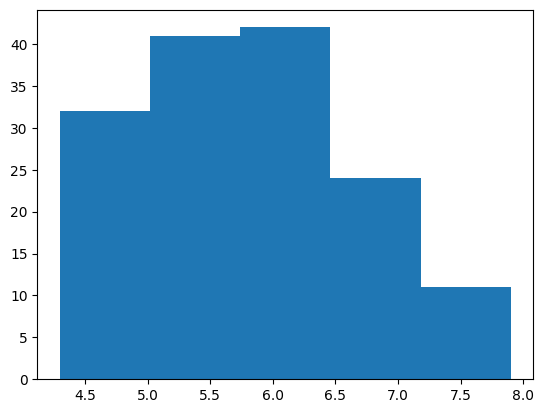

In [22]:
import matplotlib.pyplot as plt

plt.hist(iris["sepal.length"], bins=5)
plt.show()

In [24]:
import numpy as np

np.histogram(iris["sepal.length"], bins=5)

(array([32, 41, 42, 24, 11]), array([4.3 , 5.02, 5.74, 6.46, 7.18, 7.9 ]))

*Correlación*

Representa dos ejes de análisis contrastados entre el horizontal y el vertical, indicando si hay una tendencia lineal (significaría que a mayor de uno mayor del otro `directa` o a mayor del uno menor del otro `inversa`)

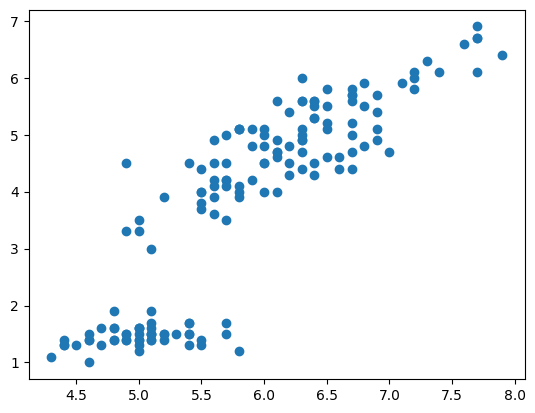

In [28]:
import matplotlib.pyplot as plt

plt.scatter(iris["sepal.length"], iris["petal.length"])
plt.show()

In [27]:
iris["sepal.length"].corr(iris["petal.length"])

0.8717537758865831

In [30]:
iris["sepal.length"].corr(iris["sepal.width"])

-0.11756978413300198

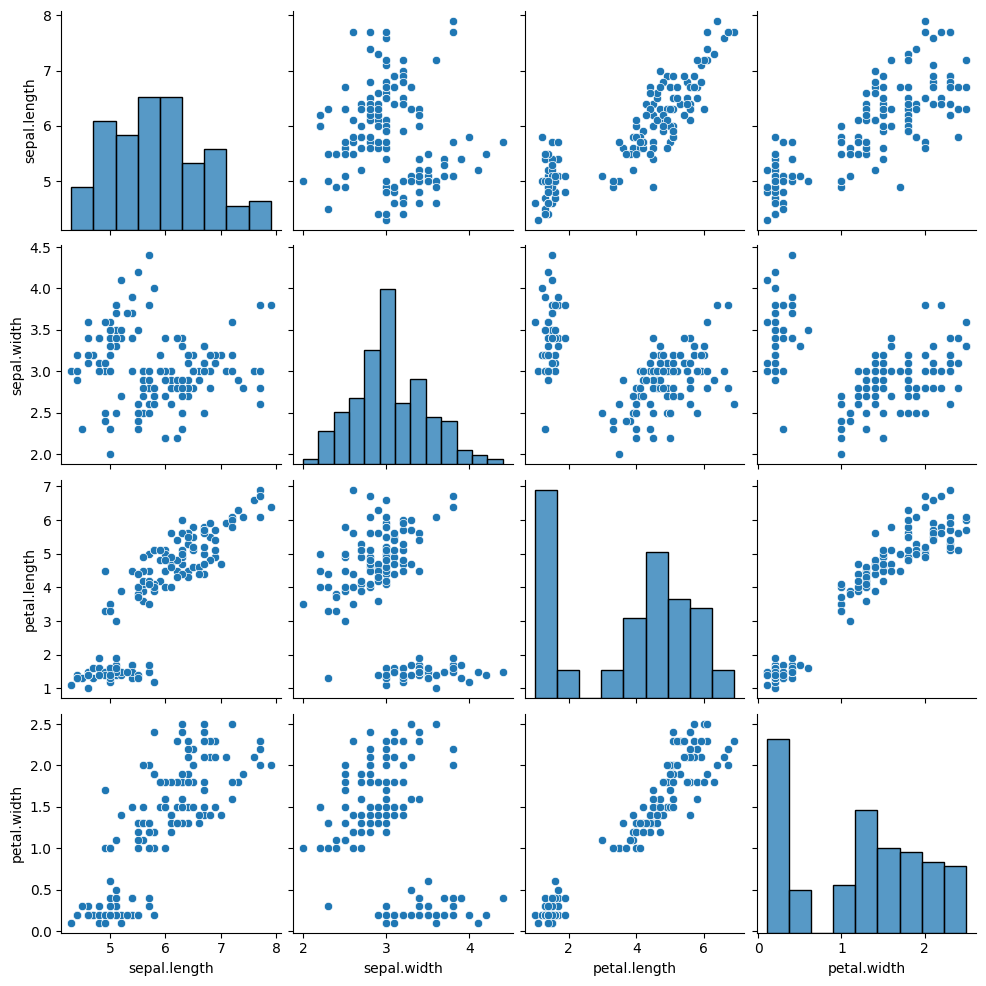

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(iris)
plt.show()